In [52]:
from mpl_toolkits.axisartist.axislines import AxesZero
import numpy as np
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

sns.set_theme(style="darkgrid")
matplotlib.rcParams.update({'font.size': 10})

data = pd.read_csv("../numerical/kOmegaSST_velocity_profiles.csv")
#data.columns


a = dict()

smooth = dict()
smooth["10"] = dict()
smooth["18"] = dict()
smooth["22"] = dict()
smooth["10"]["80"] = 6
smooth["10"]["120"] = 7
smooth["10"]["160"] = 7.5

smooth["18"]["80"] = 6
smooth["18"]["120"] = 6.5
smooth["18"]["160"] = 7

smooth["22"]["80"] = 5.5
smooth["22"]["120"] = 6.0
smooth["22"]["160"] = 6.5

b = dict()

rough = dict()
rough["10"] = dict()
rough["18"] = dict()
rough["22"] = dict()
rough["10"]["80"] = 6
rough["10"]["120"] = 7
rough["10"]["160"] = 7.5

rough["18"]["80"] = 6
rough["18"]["120"] = 6.5
rough["18"]["160"] = 7

rough["22"]["80"] = 5.5
rough["22"]["120"] = 6.0
rough["22"]["160"] = 6.5

numerical = dict()
numerical["10"] = dict()
numerical["18"] = dict()
numerical["22"] = dict()
numerical["10"]["80"] = 2.17
numerical["10"]["120"] = 2.64
numerical["10"]["160"] = 3.3800000000000003

numerical["18"]["80"] = 1.79
numerical["18"]["120"] = 2.5
numerical["18"]["160"] = 3.21

numerical["22"]["80"] = 1.74
numerical["22"]["120"] = 2.4499999999999997
numerical["22"]["160"] = 3.14

In [53]:
def objective(x,a):
    U = 10
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)



# choose the input and output variables
x, y = [80,120,160], [6,7,7.5]
# curve fit
popt, _ = curve_fit(objective, x, y)
a["10"] = popt


In [54]:
def objective(x,a):
    U = 18
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)



# choose the input and output variables
x, y = [80,120,160], [6,6.5,7]
# curve fit
popt, _ = curve_fit(objective, x, y)
a["18"] = popt


In [55]:
def objective(x,a):
    U = 22
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)



# choose the input and output variables
x, y = [80,120,160], [5.5,6.0,6.5]
# curve fit
popt, _ = curve_fit(objective, x, y)
a["22"] = popt


{'10': array([984.67459414]), '18': array([1082.23369044]), '22': array([1023.68960082])}


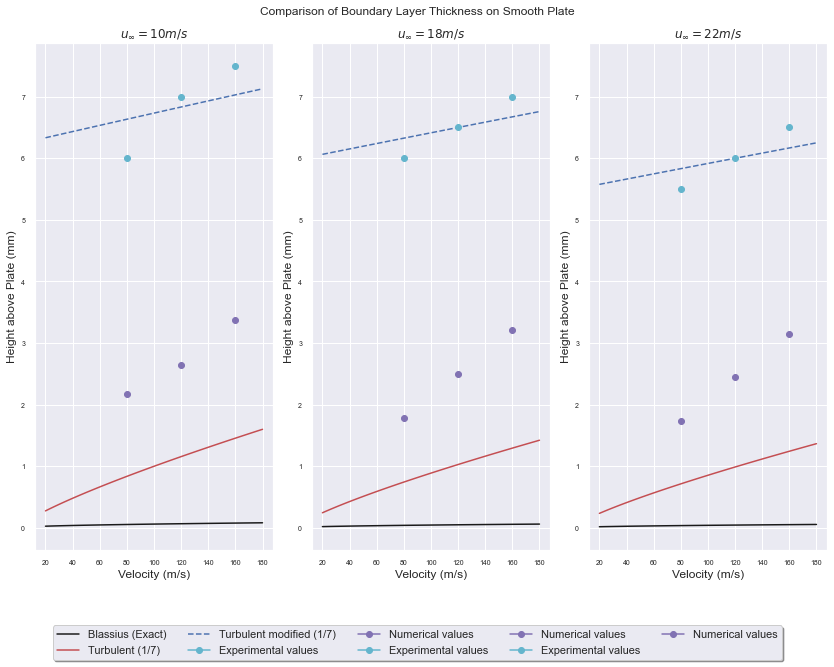

In [56]:
fig, axs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Comparison of Boundary Layer Thickness on Smooth Plate')

def blasius_solution(U,x):

    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    Re_x = (rho*U/mu)*x
    
    return 5.0 * x / np.power(Re_x,0.5)

def turbulent_solution(U,x):

    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)

for scount, speed in enumerate([10,18,22]):
    
    x = np.linspace(20,180)
    y_blassius = blasius_solution(speed,x)
    y_turbulent = turbulent_solution(speed,x)
    y_turbulent_mod = turbulent_solution(speed,x+a[f"{speed}"])    
    
    axs[scount].plot(x,y_blassius,'k-',label="Blassius (Exact)")
    axs[scount].plot(x,y_turbulent,'r-',label="Turbulent (1/7)")
    axs[scount].plot(x,y_turbulent_mod,'b--',label="Turbulent modified (1/7)")
    
    for dcount, distance in enumerate([80,120,160]):

        # Mark the experimental values on the plot
        axs[scount].plot(distance, smooth[f"{speed}"][f"{distance}"], 
                                '-co',label="Experimental values")

        # Mark the numerical values on the plot        
        axs[scount].plot(distance, numerical[f"{speed}"][f"{distance}"], 
                                '-mo',label="Numerical values")
        
        #axs[scount].legend(loc="upper left")
        axs[scount].set_title(f"$u_{{\infty}} = {speed} m/s$")            
        axs[scount].set_ylabel('Height above Plate (mm)')    
        axs[scount].set_xlabel('Velocity (m/s)')
        axs[scount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)

print(a)     
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)        
      
fig.tight_layout()
#fig.show()
fig.savefig('smooth_experimental_problems.png', bbox_inches='tight')

In [67]:
def objective(x,a):
    U = 10
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)

# choose the input and output variables
x, y = [80,120,160], [6,7,7.5]
# curve fit
popt, _ = curve_fit(objective, x, y)
b["10"] = popt


In [68]:
def objective(x,a):
    U = 18
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)



# choose the input and output variables
x, y = [80,120,160], [6,6.5,7]
# curve fit
popt, _ = curve_fit(objective, x, y)
b["18"] = popt


In [69]:
def objective(x,a):
    U = 22
    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    x = x+a
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)



# choose the input and output variables
x, y = [80,120,160], [5.5,6.0,6.5]
# curve fit
popt, _ = curve_fit(objective, x, y)
b["22"] = popt


{'10': array([984.67459414]), '18': array([1082.23369044]), '22': array([1023.68960082])}


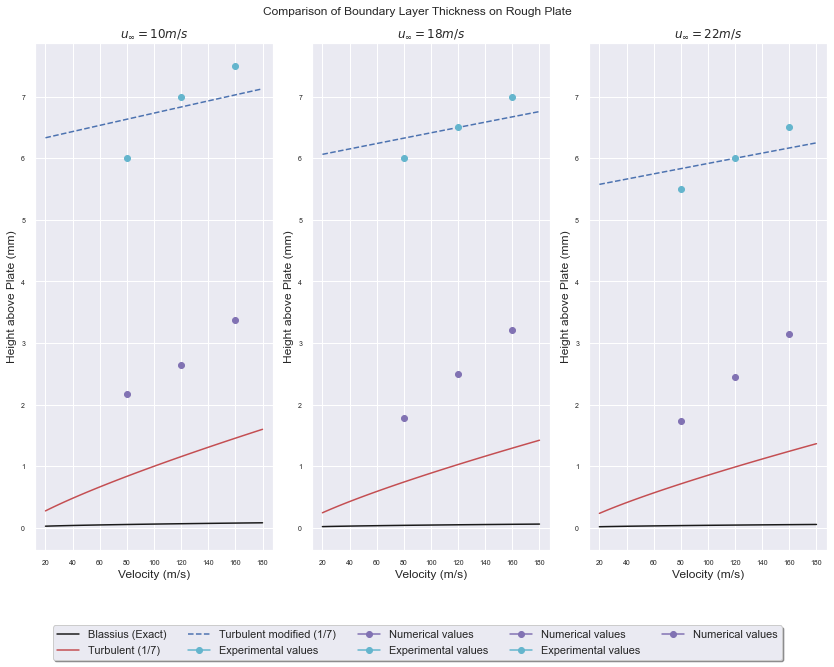

In [70]:
fig, axs = plt.subplots(1,3,sharex=True,sharey=True,figsize=(11.69,8.27))
fig.suptitle('Comparison of Boundary Layer Thickness on Rough Plate')

def blasius_solution(U,x):

    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    Re_x = (rho*U/mu)*x
    
    return 5.0 * x / np.power(Re_x,0.5)

def turbulent_solution(U,x):

    rho = 1.197292387 # Kg/m3
    mu = 1.82105E-05 # Pas
    Re_x = (rho*U/mu)*x
    
    return 0.366 * x / np.power(Re_x,1/5)

3.3800000000000003

for scount, speed in enumerate([10,18,22]):
    
    x = np.linspace(20,180)
    y_blassius = blasius_solution(speed,x)
    y_turbulent = turbulent_solution(speed,x)
    y_turbulent_mod = turbulent_solution(speed,x+b[f"{speed}"])    
    
    axs[scount].plot(x,y_blassius,'k-',label="Blassius (Exact)")
    axs[scount].plot(x,y_turbulent,'r-',label="Turbulent (1/7)")
    axs[scount].plot(x,y_turbulent_mod,'b--',label="Turbulent modified (1/7)")
    
    for dcount, distance in enumerate([80,120,160]):

        # Mark the experimental values on the plot
        axs[scount].plot(distance, rough[f"{speed}"][f"{distance}"], 
                                '-co',label="Experimental values")

        # Mark the numerical values on the plot        
        axs[scount].plot(distance, numerical[f"{speed}"][f"{distance}"], 
                                '-mo',label="Numerical values")
        
        #axs[scount].legend(loc="upper left")
        axs[scount].set_title(f"$u_{{\infty}} = {speed} m/s$")            
        axs[scount].set_ylabel('Height above Plate (mm)')    
        axs[scount].set_xlabel('Velocity (m/s)')
        axs[scount].tick_params(axis='both', which='both', 
                                        labelsize=7,
                                        labelleft=True,
                                        labelbottom=True)

print(b)     
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)        
      
fig.tight_layout()
#fig.show()
fig.savefig('rough_experimental_problems.png', bbox_inches='tight')